In [1]:
# 
#
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os

In [2]:
import pandas as pd
import numpy as np
import pickle
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [3]:
import pandas as pd
import numpy as np
import pickle
from scipy import stats
import tensorflow as tf
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


In [4]:
# /Users/wani/Desktop/
file_path = './datasets/'

In [5]:
dissoultion = pd.read_csv(file_path + 'dissolution_tank.csv', encoding='cp949')
dissoultion

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [6]:
dissoul = dissoultion.copy()
dissoul

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,OK
1,2020-03-04 0:00,1,433,78,609,3.19,OK
2,2020-03-04 0:00,2,464,154,608,3.19,OK
3,2020-03-04 0:00,3,379,212,606,3.19,OK
4,2020-03-04 0:00,4,798,1736,604,3.21,OK
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,OK
835196,2020-04-30 23:59,835196,385,206,317,3.19,OK
835197,2020-04-30 23:59,835197,465,148,316,3.20,OK
835198,2020-04-30 23:59,835198,467,0,314,3.19,OK


In [7]:
#replace(24, 100)
dissoul = dissoul.replace('OK', 0) # 정상 OK 0, 불량 NG 1 //
dissoul = dissoul.replace('NG', 1)
dissoul # 시간별 데이터 구성 살펴볼까요? EDA 

# 데이터 라벨링 ex) NG, OK  -> 1(N), 0(OK)

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,0,489,116,631,3.19,0
1,2020-03-04 0:00,1,433,78,609,3.19,0
2,2020-03-04 0:00,2,464,154,608,3.19,0
3,2020-03-04 0:00,3,379,212,606,3.19,0
4,2020-03-04 0:00,4,798,1736,604,3.21,0
...,...,...,...,...,...,...,...
835195,2020-04-30 23:59,835195,755,1743,318,3.21,0
835196,2020-04-30 23:59,835196,385,206,317,3.19,0
835197,2020-04-30 23:59,835197,465,148,316,3.20,0
835198,2020-04-30 23:59,835198,467,0,314,3.19,0


In [8]:
OK_dissoul = dissoul[dissoul['TAG'] == 0] #정상 
NG_dissoul = dissoul[dissoul['TAG'] == 1] #비정상
# 3.04 0:00 - 4.30 23:59 기간 

In [9]:
# # 비율을 살펴보자 - 원래 데이터 정상 / 비정상의 비율과 샘플 추출을 통한 전처리 후 데이터 비율은?? (알)
def ratioNormalData(data, target):
    # 정상 0
    normal = len(data[data[target] == 0])
    # 비정상 1
    abnormal = len(data[data[target] == 1])
    # 
    normal_ratio = (normal/(normal+abnormal))
    abnormal_ratio = (abnormal/(normal+abnormal))
    
    return normal_ratio, abnormal_ratio



In [10]:
# 원래 데이터 정상/ 비정상비율

ratioNormalData(dissoul, 'TAG') 


(0.7879944923371648, 0.21200550766283524)

In [11]:
ddf = pd.read_csv('10dissoulsample.csv', encoding='cp949')
ddf

,Unnamed: 0,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,1,2020-03-04 0:00,1,433,78,609,3.19,0
1,2,2020-03-04 0:01,15,772,1729,588,3.22,0
2,3,2020-03-04 0:02,27,483,167,571,3.19,0
3,4,2020-03-04 0:03,33,364,232,562,3.18,0
4,5,2020-03-04 0:04,46,402,203,543,3.18,0
...,...,...,...,...,...,...,...,...
83515,83516,2020-04-30 23:55,835154,740,1748,373,3.22,0
83516,83517,2020-04-30 23:56,835164,760,1725,355,3.21,0
83517,83518,2020-04-30 23:57,835175,759,1723,342,3.22,0
83518,83519,2020-04-30 23:58,835181,443,75,334,3.19,0


In [12]:
ratioNormalData(ddf, 'TAG') #층화추출법

(0.7899425287356322, 0.21005747126436783)

In [13]:
samplingdata = pd.read_csv('dissoulsample.csv', encoding='cp949')
samplingdata

,Unnamed: 0,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,0,2020.3.4 0:00,0,489,116,631,3.19,0
1,1,2020.3.4 0:01,10,507,128,596,3.19,0
2,2,2020.3.4 0:02,20,474,135,581,3.19,0
3,3,2020.3.4 0:03,30,437,129,567,3.19,0
4,4,2020.3.4 0:04,40,450,145,552,3.19,0
...,...,...,...,...,...,...,...,...
83515,83515,2020.4.30 23:55,835150,470,136,379,3.19,0
83516,83516,2020.4.30 23:56,835160,496,103,362,3.20,0
83517,83517,2020.4.30 23:57,835170,465,108,348,3.19,0
83518,83518,2020.4.30 23:58,835180,498,133,335,3.19,0


In [14]:
ratioNormalData(samplingdata, 'TAG')  # 계통추출법 샘플링  ( 각 시간 별 맨 위 하나씩 뽑아서 추출)


(0.849161877394636, 0.15083812260536397)

In [15]:
# 데이터 날짜별로 검색하기 ---

def datatimeFind(data, target, time):
    
    
    find = data[data[target].str.contains(time)]
    
    return find

In [16]:
datatimeFind(dissoul, 'STD_DT', '2020-04-04 0:05')


,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
446450,2020-04-04 0:05,446450,483,130,154,3.19,0
446451,2020-04-04 0:05,446451,469,80,153,3.19,0
446452,2020-04-04 0:05,446452,494,165,152,3.19,0
446453,2020-04-04 0:05,446453,393,187,150,3.19,1
446454,2020-04-04 0:05,446454,754,1751,148,3.21,0
446455,2020-04-04 0:05,446455,739,1744,147,3.22,0
446456,2020-04-04 0:05,446456,410,189,145,3.18,1
446457,2020-04-04 0:05,446457,499,163,144,3.19,0
446458,2020-04-04 0:05,446458,447,0,142,3.19,1
446459,2020-04-04 0:05,446459,508,127,141,3.20,0


In [17]:
ddfnew = pd.read_csv('10dissoulsample.csv', encoding='cp949')  #
ddf = ddfnew.copy()


In [18]:
ddf = ddf.drop('Unnamed: 0', axis = 1)
ddf


,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,1,433,78,609,3.19,0
1,2020-03-04 0:01,15,772,1729,588,3.22,0
2,2020-03-04 0:02,27,483,167,571,3.19,0
3,2020-03-04 0:03,33,364,232,562,3.18,0
4,2020-03-04 0:04,46,402,203,543,3.18,0
...,...,...,...,...,...,...,...
83515,2020-04-30 23:55,835154,740,1748,373,3.22,0
83516,2020-04-30 23:56,835164,760,1725,355,3.21,0
83517,2020-04-30 23:57,835175,759,1723,342,3.22,0
83518,2020-04-30 23:58,835181,443,75,334,3.19,0


In [19]:
sign = lambda x: (1, -1)[x < 0]

def curve_shift(data, target, shiftby):
    vector = data[target].copy()
    
    for i in range(abs(shiftby)):
        temp = vector.shift(sign(shiftby))
        temp = temp.fillna(0)
        vector += temp
    
    label = target
    
    data.insert(loc = 0, column = label + 'temp', value = vector)
    
    data = data.drop(data[data[label] == 1].index)
    #
    data = data.drop(label, axis = 1)
    data = data.rename(columns = {label + 'temp' : label})
    
    data.loc[data[label] > 0, label ] = 1
    
    return data


In [20]:
# # 비율을 살펴보자 - 원래 데이터 정상 / 비정상의 비율과 샘플 추출을 통한 전처리 후 데이터 비율은?? (알)
def ratioNormalData(data, target):
    # 정상 0
    normal = len(data[data[target] == 0])
    # 비정상 1
    abnormal = len(data[data[target] == 1])
    # 
    normal_ratio = (normal/(normal+abnormal))
    abnormal_ratio = (abnormal/(normal+abnormal))
    
    return normal_ratio, abnormal_ratio


In [21]:
ratioNormalData(ddf, 'TAG') # 층화추출법 전처리

(0.7899425287356322, 0.21005747126436783)

In [80]:
ddfCopy = ddfnew.copy()

ddfCopy = ddfCopy.drop('Unnamed: 0', axis = 1)

In [81]:
ddfCopy

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,1,433,78,609,3.19,0
1,2020-03-04 0:01,15,772,1729,588,3.22,0
2,2020-03-04 0:02,27,483,167,571,3.19,0
3,2020-03-04 0:03,33,364,232,562,3.18,0
4,2020-03-04 0:04,46,402,203,543,3.18,0
...,...,...,...,...,...,...,...
83515,2020-04-30 23:55,835154,740,1748,373,3.22,0
83516,2020-04-30 23:56,835164,760,1725,355,3.21,0
83517,2020-04-30 23:57,835175,759,1723,342,3.22,0
83518,2020-04-30 23:58,835181,443,75,334,3.19,0


In [82]:
ddfCopy.head(50000)

,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,1,433,78,609,3.19,0
1,2020-03-04 0:01,15,772,1729,588,3.22,0
2,2020-03-04 0:02,27,483,167,571,3.19,0
3,2020-03-04 0:03,33,364,232,562,3.18,0
4,2020-03-04 0:04,46,402,203,543,3.18,0
...,...,...,...,...,...,...,...
49995,2020-04-07 17:15,499959,472,124,640,3.20,0
49996,2020-04-07 17:16,499963,387,203,660,3.19,0
49997,2020-04-07 17:17,499976,442,240,660,3.19,1
49998,2020-04-07 17:18,499980,508,132,662,3.19,0


In [79]:
datatimeFind(ddfCopy, 'STD_DT', '2020-04-07 17:')

,TAGtemp,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
49980,1.0,2020-04-07 17:00,499803,374,181,315,3.19,0
49981,5.0,2020-04-07 17:01,499812,516,156,358,3.19,0
49982,11.0,2020-04-07 17:02,499825,764,1711,434,3.22,0
49983,16.0,2020-04-07 17:03,499831,467,68,472,3.18,0
49984,20.0,2020-04-07 17:04,499846,389,206,8512,3.18,0
49985,21.0,2020-04-07 17:05,499858,436,66,8529,3.19,1
49986,16.0,2020-04-07 17:06,499866,374,192,548,3.18,0
49987,11.0,2020-04-07 17:07,499871,434,0,542,3.19,1
49988,11.0,2020-04-07 17:08,499881,451,71,541,3.19,1
49989,10.0,2020-04-07 17:09,499895,749,1766,5588,3.21,0


In [83]:
shifted_df = curve_shift(ddfCopy, 'TAG', shiftby=-2) # 데이터 1분 단위로 쪼개고 shift를 2

In [84]:
shifted_df

,TAG,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
0,0.0,2020-03-04 0:00,1,433,78,609,3.19
1,0.0,2020-03-04 0:01,15,772,1729,588,3.22
2,0.0,2020-03-04 0:02,27,483,167,571,3.19
3,0.0,2020-03-04 0:03,33,364,232,562,3.18
4,0.0,2020-03-04 0:04,46,402,203,543,3.18
...,...,...,...,...,...,...,...
83515,0.0,2020-04-30 23:55,835154,740,1748,373,3.22
83516,0.0,2020-04-30 23:56,835164,760,1725,355,3.21
83517,0.0,2020-04-30 23:57,835175,759,1723,342,3.22
83518,0.0,2020-04-30 23:58,835181,443,75,334,3.19


In [85]:
#2020-04-07 17:19
datatimeFind(shifted_df, 'STD_DT', '2020-04-07 17:')

,TAG,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
49980,0.0,2020-04-07 17:00,499803,374,181,315,3.19
49981,0.0,2020-04-07 17:01,499812,516,156,358,3.19
49982,0.0,2020-04-07 17:02,499825,764,1711,434,3.22
49983,1.0,2020-04-07 17:03,499831,467,68,472,3.18
49984,1.0,2020-04-07 17:04,499846,389,206,8512,3.18
49986,1.0,2020-04-07 17:06,499866,374,192,548,3.18
49989,1.0,2020-04-07 17:09,499895,749,1766,5588,3.21
49990,1.0,2020-04-07 17:10,499908,409,80,581,3.19
49992,0.0,2020-04-07 17:12,499927,513,166,581,3.19
49993,0.0,2020-04-07 17:13,499936,394,183,5987,3.18


In [54]:
shifted_df[shifted_df['TAG'] == 1.0]

,TAG,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
18896,1.0,2020-03-17 2:56,188964,704,1765,462,3.22
18897,1.0,2020-03-17 2:57,188976,391,213,541,3.19
18898,1.0,2020-03-17 2:58,188988,459,61,5644,3.19
18902,1.0,2020-03-17 3:02,189021,427,82,649,3.19
18903,1.0,2020-03-17 3:03,189039,461,132,645,3.20
...,...,...,...,...,...,...,...
59824,1.0,2020-04-14 13:04,598243,380,232,20,3.18
59825,1.0,2020-04-14 13:05,598256,390,245,5,3.18
59835,1.0,2020-04-14 13:15,598353,399,198,668,3.18
59836,1.0,2020-04-14 13:16,598368,474,92,626,3.19


In [55]:
datatimeFind(ddfCopy, 'STD_DT', '2020-03-17 2:5')

,TAGtemp,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
18890,0.0,2020-03-17 2:50,188901,445,0,138,3.19,0
18891,0.0,2020-03-17 2:51,188918,448,0,228,3.19,0
18892,0.0,2020-03-17 2:52,188922,496,165,247,3.19,0
18893,0.0,2020-03-17 2:53,188932,520,171,302,3.20,0
18894,0.0,2020-03-17 2:54,188942,481,179,367,3.19,0
18895,0.0,2020-03-17 2:55,188951,468,54,412,3.19,0
18896,1.0,2020-03-17 2:56,188964,704,1765,462,3.22,0
18897,3.0,2020-03-17 2:57,188976,391,213,541,3.19,0
18898,3.0,2020-03-17 2:58,188988,459,61,5644,3.19,0
18899,1.0,2020-03-17 2:59,188996,343,218,622,3.19,1


In [323]:
shifted_df[shifted_df.columns[3]]

0        433
1        772
2        483
3        364
4        402
        ... 
83515    740
83516    760
83517    759
83518    443
83519    497
Name: MELT_TEMP, Length: 65976, dtype: int64

In [300]:
ratioNormalData(shifted_df, 'TAG') 

(0.7552443312719777, 0.24475566872802232)

In [325]:
# 
def splitindata(data, target):
    inputx = data[[(data.columns[3]), (data.columns[4]), (data.columns[5]),
        (data.columns[6])]]
    #inputx = data[['MELT_TEMP', 'MOTORSPEED', 'MELT_WEIGHT', 'INSP', 'TAG']]
    inputy = data[[target]]

    # x, y
    inputx = inputx.values
    inputy = inputy.values
    n_features = inputx.shape[1]
    
    return inputx, inputy, n_features




In [326]:
inputx, inputy, f_number = splitindata(shifted_df, 'TAG')

In [327]:
inputx

array([[ 433.  ,   78.  ,  609.  ,    3.19],
       [ 772.  , 1729.  ,  588.  ,    3.22],
       [ 483.  ,  167.  ,  571.  ,    3.19],
       ...,
       [ 759.  , 1723.  ,  342.  ,    3.22],
       [ 443.  ,   75.  ,  334.  ,    3.19],
       [ 497.  ,  141.  ,  323.  ,    3.2 ]])

In [158]:
def transformlization(x, y, timestep):
    x_outdata = []
    y_outdata = []
    
    #timestep = 10*timestep
    
    for i in range(len(x) - timestep -1):
        t_list = []
        
        for j in range(1, timestep + 1):
            t_list.append(x[[(i+j+1)], :])
            
        x_outdata.append(t_list)
        y_outdata.append(y[i+ timestep + 1])
    
    

    sq = np.squeeze(np.array(x_outdata))
    yd = np.array(y_outdata)
    print("======="+"완료"+"======")
    return sq, yd


In [328]:
timestep = 5 # 5 스텝 전 예측 ....
datax, datay = transformlization(inputx, inputy, timestep) 

=======완료======


In [329]:
datax

array([[[ 483.  ,  167.  ,  571.  ,    3.19],
        [ 364.  ,  232.  ,  562.  ,    3.18],
        [ 402.  ,  203.  ,  543.  ,    3.18],
        [ 398.  ,  205.  ,  528.  ,    3.18],
        [ 415.  ,  214.  ,  513.  ,    3.19]],

       [[ 364.  ,  232.  ,  562.  ,    3.18],
        [ 402.  ,  203.  ,  543.  ,    3.18],
        [ 398.  ,  205.  ,  528.  ,    3.18],
        [ 415.  ,  214.  ,  513.  ,    3.19],
        [ 428.  ,   61.  ,  505.  ,    3.18]],

       [[ 402.  ,  203.  ,  543.  ,    3.18],
        [ 398.  ,  205.  ,  528.  ,    3.18],
        [ 415.  ,  214.  ,  513.  ,    3.19],
        [ 428.  ,   61.  ,  505.  ,    3.18],
        [ 509.  ,  170.  ,  488.  ,    3.19]],

       ...,

       [[ 473.  ,  166.  ,  402.  ,    3.19],
        [ 401.  ,  214.  ,  389.  ,    3.18],
        [ 740.  , 1748.  ,  373.  ,    3.22],
        [ 760.  , 1725.  ,  355.  ,    3.21],
        [ 759.  , 1723.  ,  342.  ,    3.22]],

       [[ 401.  ,  214.  ,  389.  ,    3.18],
        [ 740

In [330]:
#
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size = 0.3)
trainx, validx, trainy, validy= train_test_split(trainx, trainy, test_size=0.2)


In [331]:
#

trainx_y0 = trainx[(trainy.reshape(-1) == 0)]
trainx_y1 = trainx[(trainy.reshape(-1) == 1)]

validx_y0 = validx[(validy.reshape(-1) == 0)]
validx_y1 = validx[(validy.reshape(-1) == 1)]

In [172]:
def flatten(data):
    # 데이터 2차원으로 변경
    #data = np.array(data).reshape(data.shape[0], 1, data.shape[1])
    flattened_X = np.empty((data.shape[0], data.shape[2]))  # sample x features array.
    for i in range(data.shape[0]):
        flattened_X[i] = data[i, (data.shape[2]-1), :]
    return(flattened_X)

def scale(data, scaler): # 다시 데이터 3차원으로 변경
    for i in range(data.shape[0]):
        data[i, :, :] = scaler.transform(data[i, :, :])
        
    return data

In [333]:
scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)

In [334]:
trainx_y0_scaled

array([[[-0.9642566 , -0.37854476,  0.02332285, -0.43468765],
        [-0.34880491, -0.47207546,  0.01544475, -0.43468765],
        [-0.35649805, -0.4966081 ,  0.00520321, -0.43468765],
        [-0.44112266, -0.47207546, -0.01685547, -0.43468765],
        [-0.45650895, -0.49200823, -0.02315796, -0.43468765]],

       [[-0.62575817, -0.73426806, -0.3170112 , -0.43468765],
        [-0.44881581, -0.73426806, -0.32095025, -0.43468765],
        [ 1.91298008,  1.91219064, -0.33828208,  2.0673747 ],
        [ 1.90528693,  1.92292367, -0.35167485,  2.0673747 ],
        [-0.87193885, -0.36167857, -0.36743106, -0.43468765]],

       [[-0.84116626, -0.44907611, -0.12399768, -1.26870843],
        [-0.57190615, -0.64227066, -0.14290512,  0.39933313],
        [ 2.02068412,  1.93212341, -0.15235885,  2.0673747 ],
        [ 1.87451434,  1.9643225 , -0.16338819,  2.0673747 ],
        [-0.12570367, -0.53034048, -0.17047848, -0.43468765]],

       ...,

       [[ 1.84374176,  1.92445696, -0.33355522,  2.

In [341]:
def autoencoder_model(train, valid, n_features):
    inputs = Input(shape = (timestep, n_features))
    
    # encoder #
    L1 = LSTM(128, activation = 'relu', return_sequences = True, 
             kernel_regularizer = regularizers.l2(10e-5))(inputs)
    L2 = LSTM(96, activation = 'relu', return_sequences = False)(L1)
    L3 = RepeatVector(timestep)(L2)
    # decoder 
    L4 = LSTM(96, activation = 'relu', return_sequences = True)(L3)
    L5 = LSTM(128, activation = 'relu', return_sequences = True)(L4)
    output = TimeDistributed(Dense(n_features))(L5)
    
    model = Model(inputs = inputs, outputs=output)
    
    return model

In [342]:
model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 5, 4)]            0         
_________________________________________________________________
lstm_44 (LSTM)               (None, 5, 128)            68096     
_________________________________________________________________
lstm_45 (LSTM)               (None, 96)                86400     
_________________________________________________________________
repeat_vector_11 (RepeatVect (None, 5, 96)             0         
_________________________________________________________________
lstm_46 (LSTM)               (None, 5, 96)             74112     
_________________________________________________________________
lstm_47 (LSTM)               (None, 5, 128)            115200    
_________________________________________________________________
time_distributed_11 (TimeDis (None, 5, 4)              516

In [343]:
epochs = 100
batchsize = 16
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history
                          #callbacks=[checkpointer, tensorboard]).history # MinMax scale // error -> list type floating

Epoch 1/100
1749/1749 [==============================] - 19s 8ms/step - loss: 0.3721 - accuracy: 0.5424 - val_loss: 0.1319 - val_accuracy: 0.6082
Epoch 2/100
1749/1749 [==============================] - 14s 8ms/step - loss: 0.1077 - accuracy: 0.6256 - val_loss: 0.0729 - val_accuracy: 0.6512
Epoch 3/100
1749/1749 [==============================] - 15s 9ms/step - loss: 0.0579 - accuracy: 0.6923 - val_loss: 0.0400 - val_accuracy: 0.7287
Epoch 4/100
1749/1749 [==============================] - 15s 8ms/step - loss: 0.0381 - accuracy: 0.7466 - val_loss: 0.0278 - val_accuracy: 0.7757
Epoch 5/100
1749/1749 [==============================] - 18s 10ms/step - loss: 0.0301 - accuracy: 0.7862 - val_loss: 0.0333 - val_accuracy: 0.7611
Epoch 6/100
1749/1749 [==============================] - 19s 11ms/step - loss: 0.0266 - accuracy: 0.8202 - val_loss: 0.0199 - val_accuracy: 0.8498
Epoch 7/100
1749/1749 [==============================] - 17s 10ms/step - loss: 0.0179 - accuracy: 0.8576 - val_loss: 0.013

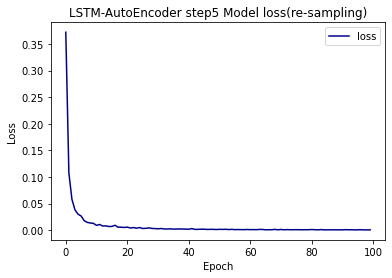

In [347]:
plt.plot(history['loss'], 'darkblue', label='loss')
plt.title('LSTM-AutoEncoder step5 Model loss(re-sampling)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #

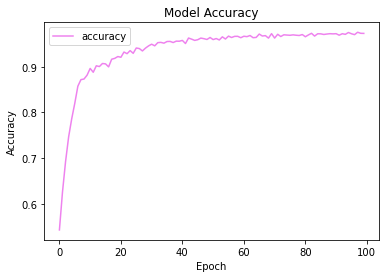

In [346]:
# 모델 정확도 시각화
plt.plot(history['accuracy'], 'violet', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

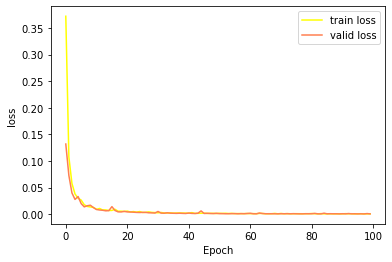

In [348]:
plt.plot(history['loss'], 'yellow', label='train loss')
plt.plot(history['val_loss'], 'coral', label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

In [349]:
precision_rt, recall_rt, threshold_rt = ReconstructionError(model, validx_scaled, validy)

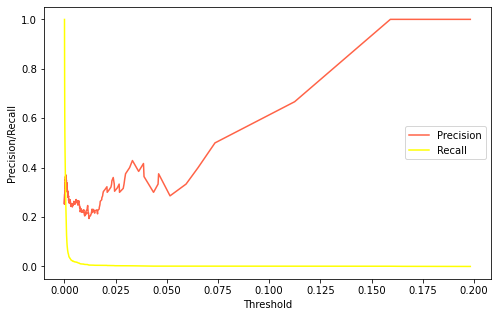

In [350]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], 'tomato', label='Precision')
plt.plot(threshold_rt, recall_rt[1:], 'yellow', label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [351]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)



precision:  0.3534963534963535 , recall:  0.3534963534963535
threshold:  0.0004572415254878606


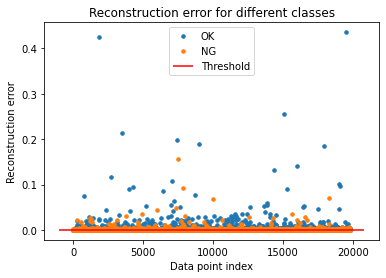

In [352]:
test_x_predictions = model.predict(testx_scaled)
mse = np.mean(np.power(flatten(testx_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': sum(testy.tolist(), [])})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "NG" if name == 1 else "OK")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

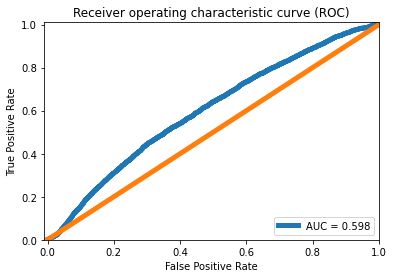

In [353]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [354]:
timestep = 10 # 10 스텝 전 예측 ....
datax, datay = transformlization(inputx, inputy, timestep) 

=======완료======


In [356]:
#
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size = 0.3)
trainx, validx, trainy, validy= train_test_split(trainx, trainy, test_size=0.2)

trainx_y0 = trainx[(trainy.reshape(-1) == 0)]
trainx_y1 = trainx[(trainy.reshape(-1) == 1)]

validx_y0 = validx[(validy.reshape(-1) == 0)]
validx_y1 = validx[(validy.reshape(-1) == 1)]

In [357]:
scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)

In [359]:
validx_scaled.shape

(9235, 10, 4)

In [360]:
# 모델 형태는 ㅇ바꾸지 않고 돌력보고 다시  평가하자..
model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary() 

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 10, 4)]           0         
_________________________________________________________________
lstm_48 (LSTM)               (None, 10, 128)           68096     
_________________________________________________________________
lstm_49 (LSTM)               (None, 96)                86400     
_________________________________________________________________
repeat_vector_12 (RepeatVect (None, 10, 96)            0         
_________________________________________________________________
lstm_50 (LSTM)               (None, 10, 96)            74112     
_________________________________________________________________
lstm_51 (LSTM)               (None, 10, 128)           115200    
_________________________________________________________________
time_distributed_12 (TimeDis (None, 10, 4)             516

In [361]:
epochs = 100
batchsize = 16
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history
                          #callbacks=[checkpointer, tensorboard]).history # MinMax scale // error -> list ty

Epoch 1/100
1747/1747 [==============================] - 30s 15ms/step - loss: 0.5819 - accuracy: 0.4867 - val_loss: 0.2959 - val_accuracy: 0.5768
Epoch 2/100
1747/1747 [==============================] - 26s 15ms/step - loss: 0.2720 - accuracy: 0.5819 - val_loss: 0.2186 - val_accuracy: 0.5999
Epoch 3/100
1747/1747 [==============================] - 27s 16ms/step - loss: 0.2130 - accuracy: 0.5982 - val_loss: 0.1934 - val_accuracy: 0.6073
Epoch 4/100
1747/1747 [==============================] - 28s 16ms/step - loss: 0.1790 - accuracy: 0.6037 - val_loss: 0.1631 - val_accuracy: 0.6146
Epoch 5/100
1747/1747 [==============================] - 26s 15ms/step - loss: 0.1576 - accuracy: 0.6063 - val_loss: 0.1578 - val_accuracy: 0.6122
Epoch 6/100
1747/1747 [==============================] - 26s 15ms/step - loss: 0.1335 - accuracy: 0.6081 - val_loss: 0.1309 - val_accuracy: 0.6107
Epoch 7/100
1747/1747 [==============================] - 28s 16ms/step - loss: 0.1201 - accuracy: 0.6104 - val_loss: 0

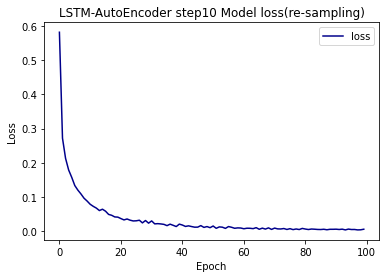

In [362]:
# 
# 
plt.plot(history['loss'], 'darkblue', label='loss')
plt.title('LSTM-AutoEncoder step10 Model loss(re-sampling)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #

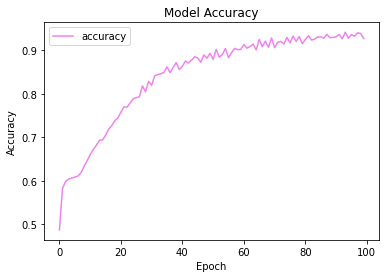

In [363]:
# 모델 정확도 시각화
plt.plot(history['accuracy'], 'violet', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

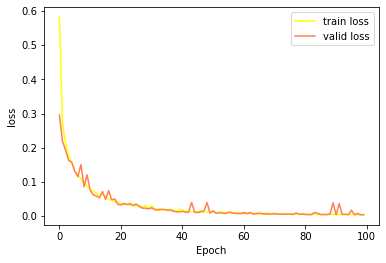

In [364]:
plt.plot(history['loss'], 'yellow', label='train loss')
plt.plot(history['val_loss'], 'coral', label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show() #불안정 

In [366]:
precision_rt, recall_rt, threshold_rt = ReconstructionError(model, validx_scaled, validy)

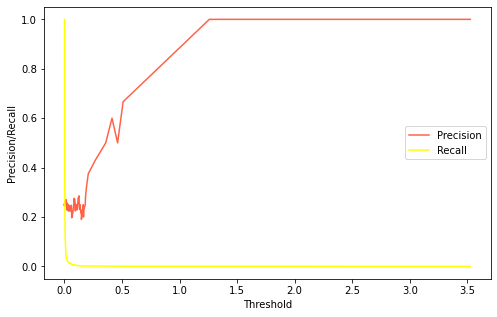

In [367]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], 'tomato', label='Precision')
plt.plot(threshold_rt, recall_rt[1:], 'yellow', label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [368]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)



precision:  0.2571053782247486 , recall:  0.2571053782247486
threshold:  0.0031248591815692204


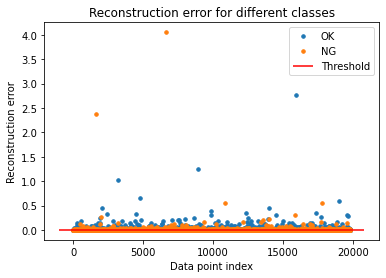

In [369]:
test_x_predictions = model.predict(testx_scaled)
mse = np.mean(np.power(flatten(testx_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': sum(testy.tolist(), [])})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "NG" if name == 1 else "OK")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

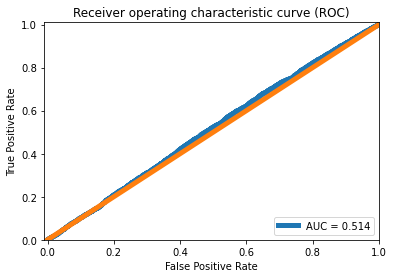

In [370]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [377]:
# 컬럼 수를 바꿔야 하나...
timestep = 4 # 5 스텝 전 예측 ....
datax, datay = transformlization(inputx, inputy, timestep) 

=======완료======


In [378]:
datax

array([[[ 483.  ,  167.  ,  571.  ,    3.19],
        [ 364.  ,  232.  ,  562.  ,    3.18],
        [ 402.  ,  203.  ,  543.  ,    3.18],
        [ 398.  ,  205.  ,  528.  ,    3.18]],

       [[ 364.  ,  232.  ,  562.  ,    3.18],
        [ 402.  ,  203.  ,  543.  ,    3.18],
        [ 398.  ,  205.  ,  528.  ,    3.18],
        [ 415.  ,  214.  ,  513.  ,    3.19]],

       [[ 402.  ,  203.  ,  543.  ,    3.18],
        [ 398.  ,  205.  ,  528.  ,    3.18],
        [ 415.  ,  214.  ,  513.  ,    3.19],
        [ 428.  ,   61.  ,  505.  ,    3.18]],

       ...,

       [[ 401.  ,  214.  ,  389.  ,    3.18],
        [ 740.  , 1748.  ,  373.  ,    3.22],
        [ 760.  , 1725.  ,  355.  ,    3.21],
        [ 759.  , 1723.  ,  342.  ,    3.22]],

       [[ 740.  , 1748.  ,  373.  ,    3.22],
        [ 760.  , 1725.  ,  355.  ,    3.21],
        [ 759.  , 1723.  ,  342.  ,    3.22],
        [ 443.  ,   75.  ,  334.  ,    3.19]],

       [[ 760.  , 1725.  ,  355.  ,    3.21],
        [ 7

In [379]:
#
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size = 0.3)
trainx, validx, trainy, validy= train_test_split(trainx, trainy, test_size=0.2)

trainx_y0 = trainx[(trainy.reshape(-1) == 0)]
trainx_y1 = trainx[(trainy.reshape(-1) == 1)]

validx_y0 = validx[(validy.reshape(-1) == 0)]
validx_y1 = validx[(validy.reshape(-1) == 1)]

In [380]:
scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)

In [382]:
validx_y0_scaled.shape

(7053, 4, 4)

In [383]:
# 모델 형태는 ㅇ바꾸지 않고 돌력보고 다시  평가하자..
model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 4, 4)]            0         
_________________________________________________________________
lstm_52 (LSTM)               (None, 4, 128)            68096     
_________________________________________________________________
lstm_53 (LSTM)               (None, 96)                86400     
_________________________________________________________________
repeat_vector_13 (RepeatVect (None, 4, 96)             0         
_________________________________________________________________
lstm_54 (LSTM)               (None, 4, 96)             74112     
_________________________________________________________________
lstm_55 (LSTM)               (None, 4, 128)            115200    
_________________________________________________________________
time_distributed_13 (TimeDis (None, 4, 4)              516

In [384]:
epochs = 100
batchsize = 16
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history
                          #callbacks=[checkpointer, tensorboard]).history # MinMax scale // error -> list ty

Epoch 1/100
1744/1744 [==============================] - 17s 7ms/step - loss: 0.2619 - accuracy: 0.5820 - val_loss: 0.0969 - val_accuracy: 0.6443
Epoch 2/100
1744/1744 [==============================] - 13s 8ms/step - loss: 0.0553 - accuracy: 0.6860 - val_loss: 0.0403 - val_accuracy: 0.6917
Epoch 3/100
1744/1744 [==============================] - 14s 8ms/step - loss: 0.0273 - accuracy: 0.7792 - val_loss: 0.0243 - val_accuracy: 0.8182
Epoch 4/100
1744/1744 [==============================] - 14s 8ms/step - loss: 0.0237 - accuracy: 0.8059 - val_loss: 0.0163 - val_accuracy: 0.8476
Epoch 5/100
1744/1744 [==============================] - 13s 7ms/step - loss: 0.0194 - accuracy: 0.8328 - val_loss: 0.0138 - val_accuracy: 0.8727
Epoch 6/100
1744/1744 [==============================] - 14s 8ms/step - loss: 0.0142 - accuracy: 0.8657 - val_loss: 0.0083 - val_accuracy: 0.9011
Epoch 7/100
1744/1744 [==============================] - 17s 10ms/step - loss: 0.0096 - accuracy: 0.8926 - val_loss: 0.0067 

1744/1744 [==============================] - 11s 6ms/step - loss: 9.0474e-04 - accuracy: 0.9703 - val_loss: 6.6096e-04 - val_accuracy: 0.9777
Epoch 57/100
1744/1744 [==============================] - 11s 6ms/step - loss: 9.8150e-04 - accuracy: 0.9690 - val_loss: 6.7362e-04 - val_accuracy: 0.9804
Epoch 58/100
1744/1744 [==============================] - 11s 6ms/step - loss: 7.0283e-04 - accuracy: 0.9738 - val_loss: 0.0014 - val_accuracy: 0.9673
Epoch 59/100
1744/1744 [==============================] - 11s 6ms/step - loss: 7.5297e-04 - accuracy: 0.9740 - val_loss: 5.8561e-04 - val_accuracy: 0.9766
Epoch 60/100
1744/1744 [==============================] - 11s 6ms/step - loss: 7.0733e-04 - accuracy: 0.9728 - val_loss: 8.0944e-04 - val_accuracy: 0.9592
Epoch 61/100
1744/1744 [==============================] - 11s 6ms/step - loss: 9.2207e-04 - accuracy: 0.9705 - val_loss: 6.4774e-04 - val_accuracy: 0.9792
Epoch 62/100
1744/1744 [==============================] - 11s 6ms/step - loss: 6.8637e-

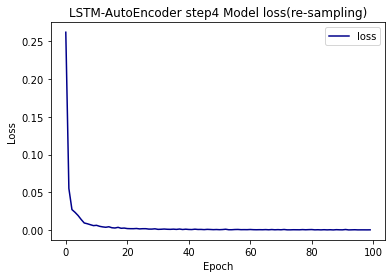

In [385]:
# 
# 
plt.plot(history['loss'], 'darkblue', label='loss')
plt.title('LSTM-AutoEncoder step4 Model loss(re-sampling)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #

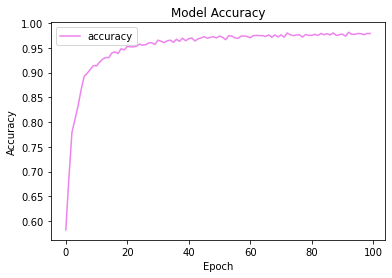

In [386]:
# 모델 정확도 시각화
plt.plot(history['accuracy'], 'violet', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

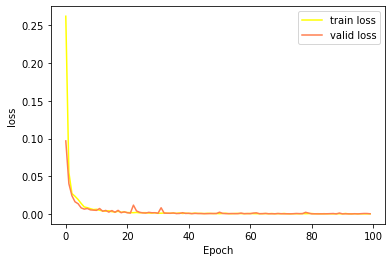

In [387]:
plt.plot(history['loss'], 'yellow', label='train loss')
plt.plot(history['val_loss'], 'coral', label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show() #불안정 

In [388]:
precision_rt, recall_rt, threshold_rt = ReconstructionError(model, validx_scaled, validy)

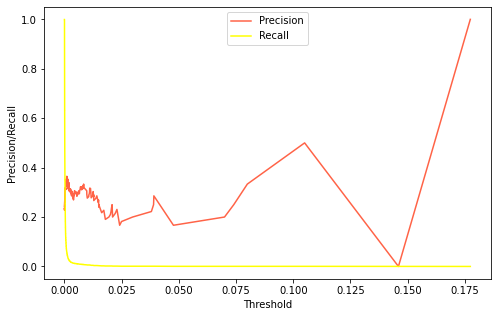

In [389]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], 'tomato', label='Precision')
plt.plot(threshold_rt, recall_rt[1:], 'yellow', label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [390]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)


precision:  0.3069170865781035 , recall:  0.3069170865781035
threshold:  0.00023413298594966885


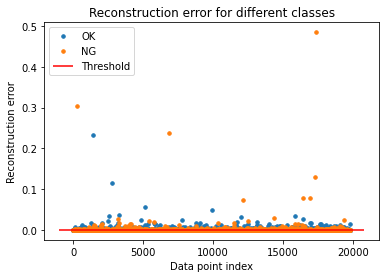

In [391]:
test_x_predictions = model.predict(testx_scaled)
mse = np.mean(np.power(flatten(testx_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': sum(testy.tolist(), [])})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "NG" if name == 1 else "OK")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

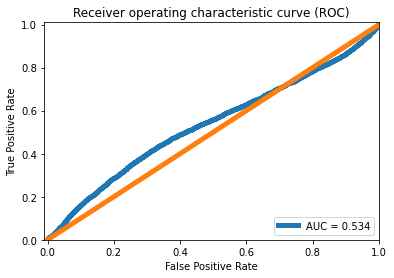

In [392]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# 파라미터. 수?


In [395]:
timestep = 5  # 5 스텝 전 예측 ....
datax, datay = transformlization(inputx, inputy, timestep) 

#
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size = 0.3)
trainx, validx, trainy, validy= train_test_split(trainx, trainy, test_size=0.2)

trainx_y0 = trainx[(trainy.reshape(-1) == 0)]
trainx_y1 = trainx[(trainy.reshape(-1) == 1)]

validx_y0 = validx[(validy.reshape(-1) == 0)]
validx_y1 = validx[(validy.reshape(-1) == 1)]

scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)

=======완료======


In [399]:
# 모델만 다르게 하여 계산 !
def autoencoder_model(train, valid, n_features):
    inputs = Input(shape = (timestep, n_features))
    
    # encoder #
    L1 = LSTM(32, activation = 'relu', return_sequences = True, 
             kernel_regularizer = regularizers.l2(10e-5))(inputs)
    L2 = LSTM(16, activation = 'relu', return_sequences = False)(L1)
    L3 = RepeatVector(timestep)(L2)
    # decoder 
    L4 = LSTM(16, activation = 'relu', return_sequences = True)(L3)
    L5 = LSTM(32, activation = 'relu', return_sequences = True)(L4)
    output = TimeDistributed(Dense(n_features))(L5)
    
    model = Model(inputs = inputs, outputs=output)
    
    return model

In [400]:
model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 5, 4)]            0         
_________________________________________________________________
lstm_60 (LSTM)               (None, 5, 32)             4736      
_________________________________________________________________
lstm_61 (LSTM)               (None, 16)                3136      
_________________________________________________________________
repeat_vector_15 (RepeatVect (None, 5, 16)             0         
_________________________________________________________________
lstm_62 (LSTM)               (None, 5, 16)             2112      
_________________________________________________________________
lstm_63 (LSTM)               (None, 5, 32)             6272      
_________________________________________________________________
time_distributed_15 (TimeDis (None, 5, 4)              132

In [401]:
epochs = 100
batchsize = 16
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history


# 모델 파라이터줄이면 ㅈ성늦 작아짐...

Epoch 1/100
1748/1748 [==============================] - 16s 7ms/step - loss: 0.4685 - accuracy: 0.5124 - val_loss: 0.2395 - val_accuracy: 0.5734
Epoch 2/100
1748/1748 [==============================] - 11s 6ms/step - loss: 0.1836 - accuracy: 0.5897 - val_loss: 0.1462 - val_accuracy: 0.6076
Epoch 3/100
1748/1748 [==============================] - 12s 7ms/step - loss: 0.1338 - accuracy: 0.5994 - val_loss: 0.1306 - val_accuracy: 0.6014
Epoch 4/100
1748/1748 [==============================] - 12s 7ms/step - loss: 0.1071 - accuracy: 0.6103 - val_loss: 0.1134 - val_accuracy: 0.5802
Epoch 5/100
1748/1748 [==============================] - 11s 6ms/step - loss: 0.0896 - accuracy: 0.6157 - val_loss: 0.0918 - val_accuracy: 0.6260
Epoch 6/100
1748/1748 [==============================] - 13s 7ms/step - loss: 0.0772 - accuracy: 0.6266 - val_loss: 0.0775 - val_accuracy: 0.5926
Epoch 7/100
1748/1748 [==============================] - 11s 6ms/step - loss: 0.0688 - accuracy: 0.6350 - val_loss: 0.0665 -

Epoch 57/100
1748/1748 [==============================] - 11s 6ms/step - loss: 0.0056 - accuracy: 0.9200 - val_loss: 0.0076 - val_accuracy: 0.8978
Epoch 58/100
1748/1748 [==============================] - 10s 6ms/step - loss: 0.0055 - accuracy: 0.9210 - val_loss: 0.0046 - val_accuracy: 0.9317
Epoch 59/100
1748/1748 [==============================] - 12s 7ms/step - loss: 0.0049 - accuracy: 0.9252 - val_loss: 0.0043 - val_accuracy: 0.9267
Epoch 60/100
1748/1748 [==============================] - 11s 6ms/step - loss: 0.0048 - accuracy: 0.9270 - val_loss: 0.0048 - val_accuracy: 0.9334
Epoch 61/100
1748/1748 [==============================] - 10s 6ms/step - loss: 0.0059 - accuracy: 0.9198 - val_loss: 0.0043 - val_accuracy: 0.9315
Epoch 62/100
1748/1748 [==============================] - 11s 6ms/step - loss: 0.0044 - accuracy: 0.9302 - val_loss: 0.0050 - val_accuracy: 0.9188
Epoch 63/100
1748/1748 [==============================] - 12s 7ms/step - loss: 0.0055 - accuracy: 0.9218 - val_loss: 0

In [404]:
# 모델만 다르게 하여 계산 ! - 파라미터 수 늘이기
def autoencoder_model(train, valid, n_features):
    inputs = Input(shape = (timestep, n_features))
    
    # encoder #
    L1 = LSTM(256, activation = 'relu', return_sequences = True, 
             kernel_regularizer = regularizers.l2(10e-5))(inputs)
    L2 = LSTM(128, activation = 'relu', return_sequences = False)(L1)
    L3 = RepeatVector(timestep)(L2)
    # decoder 
    L4 = LSTM(128, activation = 'relu', return_sequences = True)(L3)
    L5 = LSTM(256, activation = 'relu', return_sequences = True)(L4)
    output = TimeDistributed(Dense(n_features))(L5)
    
    model = Model(inputs = inputs, outputs=output)
    
    return model

In [405]:
model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 5, 4)]            0         
_________________________________________________________________
lstm_64 (LSTM)               (None, 5, 256)            267264    
_________________________________________________________________
lstm_65 (LSTM)               (None, 128)               197120    
_________________________________________________________________
repeat_vector_16 (RepeatVect (None, 5, 128)            0         
_________________________________________________________________
lstm_66 (LSTM)               (None, 5, 128)            131584    
_________________________________________________________________
lstm_67 (LSTM)               (None, 5, 256)            394240    
_________________________________________________________________
time_distributed_16 (TimeDis (None, 5, 4)              102

In [406]:
epochs = 100
batchsize = 16
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history


# 

Epoch 1/100
1748/1748 [==============================] - 34s 17ms/step - loss: 0.3422 - accuracy: 0.5529 - val_loss: 0.1808 - val_accuracy: 0.6235
Epoch 2/100
1748/1748 [==============================] - 30s 17ms/step - loss: 0.1026 - accuracy: 0.6405 - val_loss: 0.0648 - val_accuracy: 0.7063
Epoch 3/100
1748/1748 [==============================] - 30s 17ms/step - loss: 0.0524 - accuracy: 0.7188 - val_loss: 0.0424 - val_accuracy: 0.7496
Epoch 4/100
1748/1748 [==============================] - 29s 17ms/step - loss: 0.0332 - accuracy: 0.7736 - val_loss: 0.0334 - val_accuracy: 0.7961
Epoch 5/100
1748/1748 [==============================] - 25s 14ms/step - loss: 0.0304 - accuracy: 0.8079 - val_loss: 0.0410 - val_accuracy: 0.7908
Epoch 6/100
1748/1748 [==============================] - 29s 17ms/step - loss: 0.0193 - accuracy: 0.8572 - val_loss: 0.0160 - val_accuracy: 0.8644
Epoch 7/100
1748/1748 [==============================] - 29s 17ms/step - loss: 0.0172 - accuracy: 0.8659 - val_loss: 0

In [131]:
shifted_cessing_df = curve_shift(ddf, 'TAG', shiftby=-2) # 데이터 1분 단위로 쪼개고 shift를 2 


In [132]:
shifted_cessing_df[shifted_cessing_df['TAG'] == 1.0]


,TAG,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP
18897,1.0,2020-03-17 2:57,188976,391,213,541,3.19
18898,1.0,2020-03-17 2:58,188988,459,61,5644,3.19
18903,1.0,2020-03-17 3:03,189039,461,132,645,3.20
18904,1.0,2020-03-17 3:04,189041,411,77,630,3.19
18910,1.0,2020-03-17 3:10,189101,468,86,528,3.19
...,...,...,...,...,...,...,...
59815,1.0,2020-04-14 12:55,598154,757,1725,154,3.22
59824,1.0,2020-04-14 13:04,598243,380,232,20,3.18
59825,1.0,2020-04-14 13:05,598256,390,245,5,3.18
59836,1.0,2020-04-14 13:16,598368,474,92,626,3.19


In [134]:
ratioNormalData(shifted_cessing_df, 'TAG') #정상 비정상 -shit data (그룹별 랜덤 추출 후 ) #


(0.8009579240936098, 0.1990420759063902)

In [155]:
inputx, inputy, f_number = splitindata(shifted_cessing_df, 'TAG')

In [156]:
inputx.shape

(65976, 5)

In [157]:
inputx

array([[1.00000e+00, 4.33000e+02, 7.80000e+01, 6.09000e+02, 3.19000e+00],
       [1.50000e+01, 7.72000e+02, 1.72900e+03, 5.88000e+02, 3.22000e+00],
       [2.70000e+01, 4.83000e+02, 1.67000e+02, 5.71000e+02, 3.19000e+00],
       ...,
       [8.35175e+05, 7.59000e+02, 1.72300e+03, 3.42000e+02, 3.22000e+00],
       [8.35181e+05, 4.43000e+02, 7.50000e+01, 3.34000e+02, 3.19000e+00],
       [8.35190e+05, 4.97000e+02, 1.41000e+02, 3.23000e+02, 3.20000e+00]])

In [168]:
timestep = 5 # 
datax, datay = transformlization(inputx, inputy, timestep) 

=======완료======


In [260]:
datax.shape


(65970, 5, 5)

In [169]:
# 비율
trainx, testx, trainy, testy = train_test_split(datax, datay, test_size = 0.3)
trainx, validx, trainy, validy= train_test_split(trainx, trainy, test_size=0.2)

In [170]:
print(len(trainx))  # 
print(len(validx))
print(len(testx))

36943
9236
19791


In [171]:
#
trainx_y0 = trainx[(trainy.reshape(-1) == 0)]
trainx_y1 = trainx[(trainy.reshape(-1) == 1)]

validx_y0 = validx[(validy.reshape(-1) == 0)]
validx_y1 = validx[(validy.reshape(-1) == 1)]

In [173]:
scaler = StandardScaler().fit(flatten(trainx_y0))
trainx_y0_scaled = scale(trainx_y0, scaler)
validx_scaled = scale(validx, scaler)
validx_y0_scaled = scale(validx_y0, scaler)
testx_scaled = scale(testx, scaler)

In [174]:
validx_scaled

array([[[-0.86874713, -1.10487534, -0.4648432 , -0.00971948,
         -1.27532306],
        [-0.86872294, -0.90599589, -0.43596604, -0.01863993,
         -1.27532306],
        [-0.86867456, -0.30935753, -0.48156156, -0.03566988,
         -0.44740998],
        [-0.86866419, -0.40879726, -0.52107767, -0.03891368,
          0.3805031 ],
        [-0.8686089 , -0.9901372 , -0.39796977, -0.05918743,
         -1.27532306]],

       [[-1.09035981, -0.44704331, -0.65026498,  0.29681961,
         -0.44740998],
        [-1.09034253, -1.01308483, -0.39948963,  0.29114296,
         -1.27532306],
        [-1.09030452,  1.72533225,  1.90764362,  0.27897871,
          1.20841618],
        [-1.09028379, -0.25581307, -0.54387543,  0.27330206,
         -0.44740998],
        [-1.09022504, -0.24051465, -0.47700201,  0.25383926,
          0.3805031 ]],

       [[ 1.04732414, -0.362902  , -0.53323648, -0.26841253,
         -0.44740998],
        [ 1.0473587 , -0.23286544, -0.53019678, -0.28138773,
         -0

In [175]:
trainx_y0_scaled.shape 

(29537, 5, 5)

In [176]:
def autoencoder_model(train, valid, n_features):
    inputs = Input(shape = (timestep, n_features))
    
    # encoder #
    L1 = LSTM(96, activation = 'relu', return_sequences = True, 
             kernel_regularizer = regularizers.l2(10e-5))(inputs)
    L2 = LSTM(48, activation = 'relu', return_sequences = False)(L1)
    L3 = RepeatVector(timestep)(L2)
    # decoder 
    L4 = LSTM(96, activation = 'relu', return_sequences = True)(L3)
    L5 = LSTM(48, activation = 'relu', return_sequences = True)(L4)
    output = TimeDistributed(Dense(n_features))(L5)
    
    model = Model(inputs = inputs, outputs=output)
    
    return model

In [177]:
model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 5, 5)]            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 5, 96)             39168     
_________________________________________________________________
lstm_21 (LSTM)               (None, 48)                27840     
_________________________________________________________________
repeat_vector_5 (RepeatVecto (None, 5, 48)             0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 5, 96)             55680     
_________________________________________________________________
lstm_23 (LSTM)               (None, 5, 48)             27840     
_________________________________________________________________
time_distributed_5 (TimeDist (None, 5, 5)              245 

In [178]:
epochs = 100
batchsize = 64
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history
                          #callbacks=[checkpointer, tensorboard]).history # MinMax scale // error -> list type floating

Epoch 1/100
462/462 [==============================] - 7s 10ms/step - loss: 0.3866 - accuracy: 0.6251 - val_loss: 0.1692 - val_accuracy: 0.6852
Epoch 2/100
462/462 [==============================] - 4s 9ms/step - loss: 0.1223 - accuracy: 0.6994 - val_loss: 0.1024 - val_accuracy: 0.7025
Epoch 3/100
462/462 [==============================] - 4s 9ms/step - loss: 0.0804 - accuracy: 0.7130 - val_loss: 0.0619 - val_accuracy: 0.7187
Epoch 4/100
462/462 [==============================] - 4s 9ms/step - loss: 0.0547 - accuracy: 0.7279 - val_loss: 0.0462 - val_accuracy: 0.7299
Epoch 5/100
462/462 [==============================] - 4s 9ms/step - loss: 0.0402 - accuracy: 0.7397 - val_loss: 0.0434 - val_accuracy: 0.7372
Epoch 6/100
462/462 [==============================] - 4s 9ms/step - loss: 0.0324 - accuracy: 0.7561 - val_loss: 0.0308 - val_accuracy: 0.7654
Epoch 7/100
462/462 [==============================] - 4s 9ms/step - loss: 0.0253 - accuracy: 0.7833 - val_loss: 0.0263 - val_accuracy: 0.794

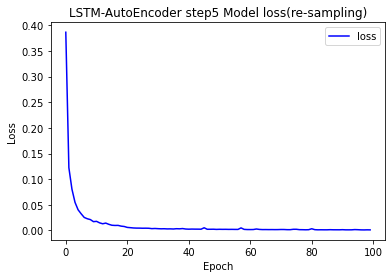

In [179]:
#TadGAN # epochs = 100
plt.plot(history['loss'], 'b-', label='loss')
plt.title('LSTM-AutoEncoder step5 Model loss(re-sampling)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #

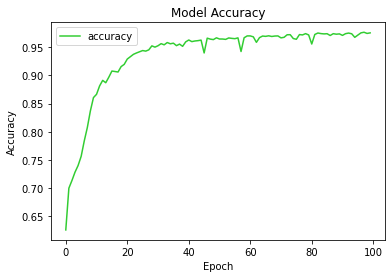

In [180]:
# 모델 정확도 시각화
plt.plot(history['accuracy'], 'limegreen', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

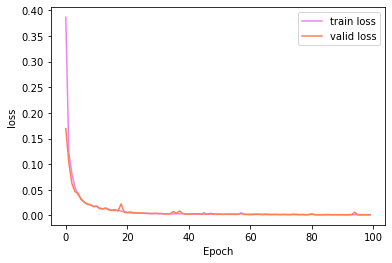

In [181]:
plt.plot(history['loss'], 'violet', label='train loss')
plt.plot(history['val_loss'], 'coral', label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()


In [182]:
def ReconstructionError(x, valid_data, y_valid): #x_valid_scaled
    valid_x_predictions = x.predict(valid_data)
    mse = np.mean(np.power(flatten(valid_data) - flatten(valid_x_predictions), 2), axis=1)
    error_df = pd.DataFrame({'Reconstruction_error':mse, 'True_class': sum(validy.tolist(), [])})
    precision_rt, recall_rt, threshold_rt = metrics.precision_recall_curve(error_df['True_class'], 
                                                                           error_df['Reconstruction_error'])
    
    return precision_rt, recall_rt, threshold_rt


In [183]:
precision_rt, recall_rt, threshold_rt = ReconstructionError(model, validx_scaled, validy)


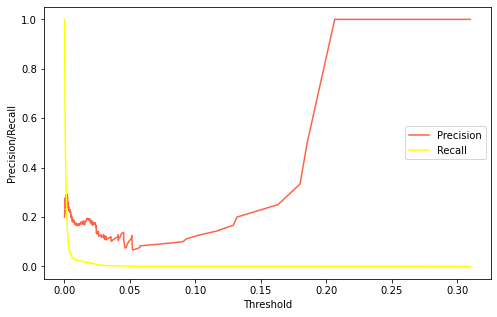

In [184]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], 'tomato', label='Precision')
plt.plot(threshold_rt, recall_rt[1:], 'yellow', label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [185]:
def bestThresholdfind():
    index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
    print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])




In [186]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)


precision:  0.2847826086956522 , recall:  0.2847826086956522
threshold:  0.0014353310500093358


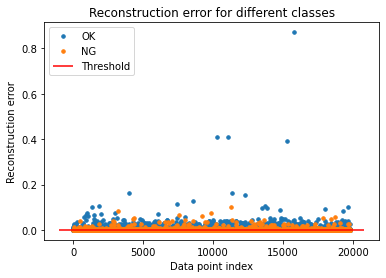

In [187]:
test_x_predictions = model.predict(testx_scaled)
mse = np.mean(np.power(flatten(testx_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': sum(testy.tolist(), [])})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "NG" if name == 1 else "OK")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();


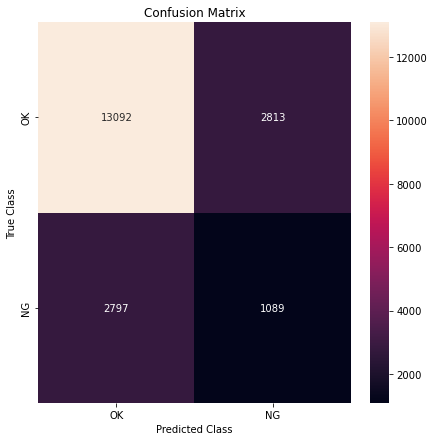

In [188]:
LABELS = ['OK', 'NG']
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

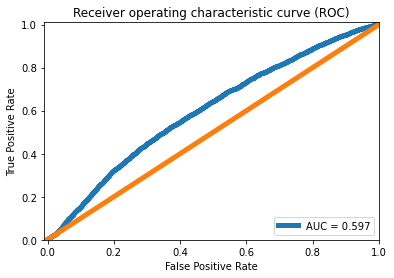

In [189]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [233]:
# 이번에는 배치를 늘려서 불안정한 훈련을 방지 - 16 

model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 5, 5)]            0         
_________________________________________________________________
lstm_28 (LSTM)               (None, 5, 96)             39168     
_________________________________________________________________
lstm_29 (LSTM)               (None, 48)                27840     
_________________________________________________________________
repeat_vector_7 (RepeatVecto (None, 5, 48)             0         
_________________________________________________________________
lstm_30 (LSTM)               (None, 5, 96)             55680     
_________________________________________________________________
lstm_31 (LSTM)               (None, 5, 48)             27840     
_________________________________________________________________
time_distributed_7 (TimeDist (None, 5, 5)              245 

In [234]:
epochs = 100
batchsize = 16
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history
                          #callbacks=[checkpointer, tensorboard]).history # MinMax scale // error -> list type f

Epoch 1/100
1847/1847 [==============================] - 15s 6ms/step - loss: 0.2623 - accuracy: 0.6567 - val_loss: 0.1367 - val_accuracy: 0.7088
Epoch 2/100
1847/1847 [==============================] - 12s 6ms/step - loss: 0.0911 - accuracy: 0.7140 - val_loss: 0.0662 - val_accuracy: 0.7296
Epoch 3/100
1847/1847 [==============================] - 12s 7ms/step - loss: 0.0520 - accuracy: 0.7400 - val_loss: 0.0446 - val_accuracy: 0.7469
Epoch 4/100
1847/1847 [==============================] - 12s 7ms/step - loss: 0.0361 - accuracy: 0.7913 - val_loss: 0.0286 - val_accuracy: 0.8335
Epoch 5/100
1847/1847 [==============================] - 18s 10ms/step - loss: 0.0266 - accuracy: 0.8449 - val_loss: 0.0218 - val_accuracy: 0.8865
Epoch 6/100
1847/1847 [==============================] - 16s 9ms/step - loss: 0.0211 - accuracy: 0.8713 - val_loss: 0.0232 - val_accuracy: 0.8778
Epoch 7/100
1847/1847 [==============================] - 12s 7ms/step - loss: 0.0193 - accuracy: 0.8815 - val_loss: 0.0160 

Epoch 57/100
1847/1847 [==============================] - 14s 7ms/step - loss: 0.0011 - accuracy: 0.9757 - val_loss: 0.0011 - val_accuracy: 0.9775
Epoch 58/100
1847/1847 [==============================] - 13s 7ms/step - loss: 0.0012 - accuracy: 0.9751 - val_loss: 0.0015 - val_accuracy: 0.9710
Epoch 59/100
1847/1847 [==============================] - 13s 7ms/step - loss: 0.0014 - accuracy: 0.9740 - val_loss: 0.0018 - val_accuracy: 0.9671
Epoch 60/100
1847/1847 [==============================] - 14s 8ms/step - loss: 0.0012 - accuracy: 0.9765 - val_loss: 0.0024 - val_accuracy: 0.9543
Epoch 61/100
1847/1847 [==============================] - 13s 7ms/step - loss: 0.0011 - accuracy: 0.9768 - val_loss: 0.0014 - val_accuracy: 0.9789
Epoch 62/100
1847/1847 [==============================] - 13s 7ms/step - loss: 0.0015 - accuracy: 0.9727 - val_loss: 0.0028 - val_accuracy: 0.9636
Epoch 63/100
1847/1847 [==============================] - 11s 6ms/step - loss: 9.8687e-04 - accuracy: 0.9775 - val_los

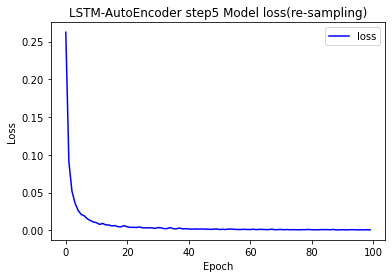

In [235]:
# epochs = 100
plt.plot(history['loss'], 'b-', label='loss')
plt.title('LSTM-AutoEncoder step5 Model loss(re-sampling)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #

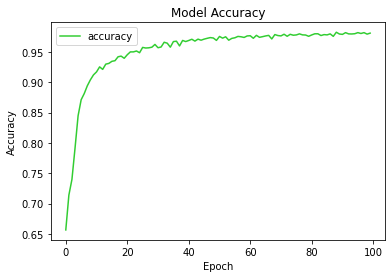

In [236]:
# 모델 정확도 시각화
plt.plot(history['accuracy'], 'limegreen', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

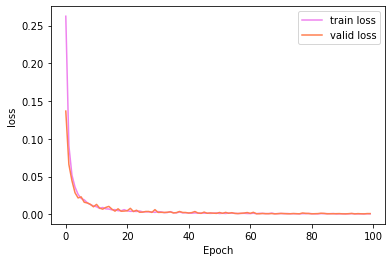

In [237]:
plt.plot(history['loss'], 'violet', label='train loss')
plt.plot(history['val_loss'], 'coral', label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()



In [238]:
precision_rt, recall_rt, threshold_rt = ReconstructionError(model, validx_scaled, validy)

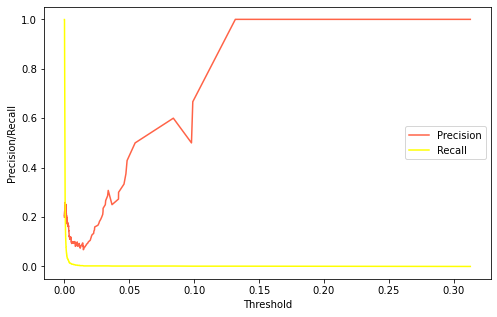

In [239]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], 'tomato', label='Precision')
plt.plot(threshold_rt, recall_rt[1:], 'yellow', label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [240]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)



precision:  0.2505434782608696 , recall:  0.2505434782608696
threshold:  0.0005206035907337278


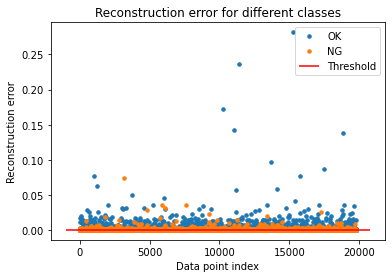

In [241]:
test_x_predictions = model.predict(testx_scaled)
mse = np.mean(np.power(flatten(testx_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': sum(testy.tolist(), [])})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "NG" if name == 1 else "OK")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();



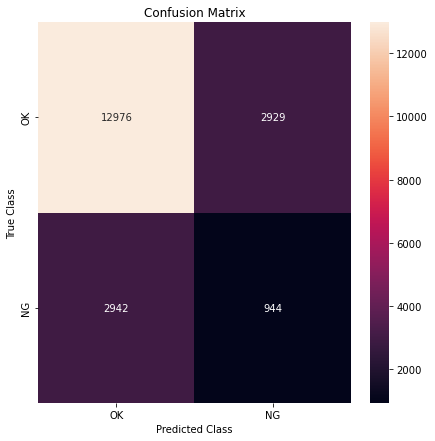

In [242]:
LABELS = ['OK', 'NG']
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

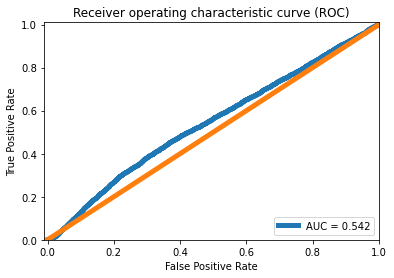

In [243]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# 모델의 파라미터 수 조정 - 더 적게 / 이 결과가 좋지 못하면 step 조정  timestep = 5 # 
#datax, datay = transformlization(inputx, inputy, timestep) 


In [244]:
# 파라미터 수 줄이기 
def autoencoder_model(train, valid, n_features):
    inputs = Input(shape = (timestep, n_features))
    
    # encoder #
    L1 = LSTM(32, activation = 'relu', return_sequences = True, 
             kernel_regularizer = regularizers.l2(10e-5))(inputs)
    L2 = LSTM(16, activation = 'relu', return_sequences = False)(L1)
    L3 = RepeatVector(timestep)(L2)
    # decoder 
    L4 = LSTM(16, activation = 'relu', return_sequences = True)(L3)
    L5 = LSTM(32, activation = 'relu', return_sequences = True)(L4)
    output = TimeDistributed(Dense(n_features))(L5)
    
    model = Model(inputs = inputs, outputs=output)
    
    return model

In [246]:
# 이번에는 배치를 늘려서 불안정한 훈련을 방지

model = autoencoder_model(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])
model.compile(optimizer = 'adam', loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 5, 5)]            0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 5, 32)             4864      
_________________________________________________________________
lstm_33 (LSTM)               (None, 16)                3136      
_________________________________________________________________
repeat_vector_8 (RepeatVecto (None, 5, 16)             0         
_________________________________________________________________
lstm_34 (LSTM)               (None, 5, 16)             2112      
_________________________________________________________________
lstm_35 (LSTM)               (None, 5, 32)             6272      
_________________________________________________________________
time_distributed_8 (TimeDist (None, 5, 5)              165 

In [247]:
epochs = 100
batchsize = 16 # 적당한 파라미터 수로 ㅈ최적의 업데이트로 계산량과 불안정 잡기.... acu 과적합 이루어짐
history = model.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history

Epoch 1/100
1847/1847 [==============================] - 14s 6ms/step - loss: 0.3618 - accuracy: 0.6189 - val_loss: 0.1620 - val_accuracy: 0.6809
Epoch 2/100
1847/1847 [==============================] - 13s 7ms/step - loss: 0.1294 - accuracy: 0.6957 - val_loss: 0.1711 - val_accuracy: 0.6642
Epoch 3/100
1847/1847 [==============================] - 11s 6ms/step - loss: 0.0974 - accuracy: 0.7107 - val_loss: 0.0896 - val_accuracy: 0.7188
Epoch 4/100
1847/1847 [==============================] - 11s 6ms/step - loss: 0.0733 - accuracy: 0.7246 - val_loss: 0.0780 - val_accuracy: 0.7415
Epoch 5/100
1847/1847 [==============================] - 12s 6ms/step - loss: 0.0532 - accuracy: 0.7327 - val_loss: 0.0576 - val_accuracy: 0.7315
Epoch 6/100
1847/1847 [==============================] - 13s 7ms/step - loss: 0.0436 - accuracy: 0.7407 - val_loss: 0.0408 - val_accuracy: 0.7526
Epoch 7/100
1847/1847 [==============================] - 14s 8ms/step - loss: 0.0386 - accuracy: 0.7433 - val_loss: 0.0395 -

Epoch 57/100
1847/1847 [==============================] - 11s 6ms/step - loss: 0.0032 - accuracy: 0.9608 - val_loss: 0.0053 - val_accuracy: 0.9429
Epoch 58/100
1847/1847 [==============================] - 11s 6ms/step - loss: 0.0035 - accuracy: 0.9582 - val_loss: 0.0038 - val_accuracy: 0.9603
Epoch 59/100
1847/1847 [==============================] - 11s 6ms/step - loss: 0.0036 - accuracy: 0.9573 - val_loss: 0.0056 - val_accuracy: 0.9389
Epoch 60/100
1847/1847 [==============================] - 12s 7ms/step - loss: 0.0032 - accuracy: 0.9606 - val_loss: 0.0036 - val_accuracy: 0.9583
Epoch 61/100
1847/1847 [==============================] - 11s 6ms/step - loss: 0.0035 - accuracy: 0.9587 - val_loss: 0.0055 - val_accuracy: 0.9504
Epoch 62/100
1847/1847 [==============================] - 11s 6ms/step - loss: 0.0032 - accuracy: 0.9604 - val_loss: 0.0044 - val_accuracy: 0.9579
Epoch 63/100
1847/1847 [==============================] - 10s 6ms/step - loss: 0.0033 - accuracy: 0.9595 - val_loss: 0

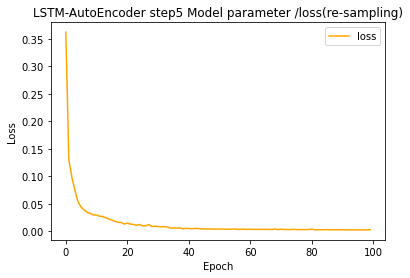

In [249]:

plt.plot(history['loss'], 'orange', label='loss')
plt.title('LSTM-AutoEncoder step5 Model parameter /loss(re-sampling)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #

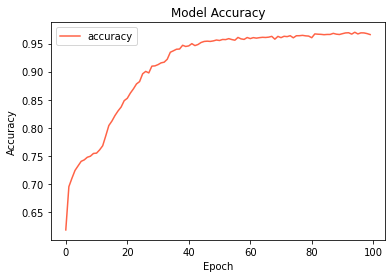

In [250]:
# 모델 정확도 시각화
plt.plot(history['accuracy'], 'tomato', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

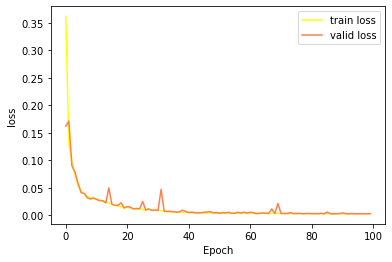

In [252]:
plt.plot(history['loss'], 'yellow', label='train loss')
plt.plot(history['val_loss'], 'coral', label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show() # train valid loss 불안정 함

In [253]:
precision_rt, recall_rt, threshold_rt = ReconstructionError(model, validx_scaled, validy)

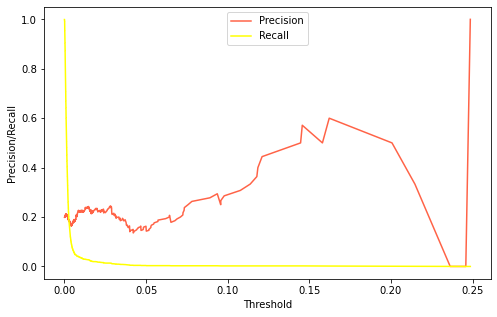

In [254]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], 'tomato', label='Precision')
plt.plot(threshold_rt, recall_rt[1:], 'yellow', label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [255]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)

precision:  0.18315217391304348 , recall:  0.18315217391304348
threshold:  0.0027864121037790056


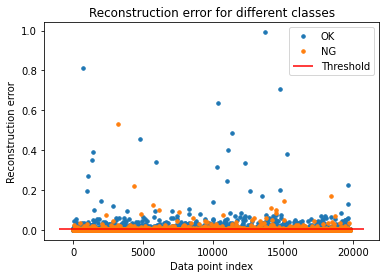

In [256]:
test_x_predictions = model.predict(testx_scaled)
mse = np.mean(np.power(flatten(testx_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': sum(testy.tolist(), [])})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "NG" if name == 1 else "OK")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();




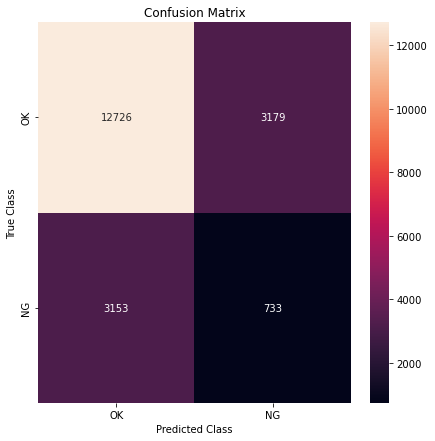

In [257]:
LABELS = ['OK', 'NG']
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

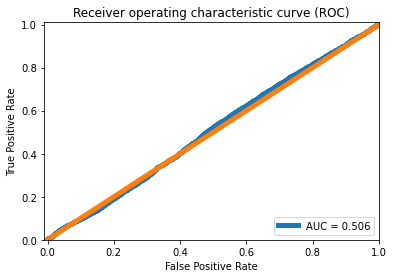

In [258]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show() #실페


In [ ]:
# 확실히 파마리터 수는 96/48 적절하지 않으면 학습 문제....

In [190]:
def LSTMModel(train, valid, n_features):
    inputs = Input(shape = (timestep, n_features))
    lstm = Sequential()
    # Encoder
    lstm.add(LSTM(128, activation='relu', input_shape=(timestep, n_features), return_sequences=True))
    lstm.add(LSTM(64, activation='relu', return_sequences=False))
    lstm.add(RepeatVector(timestep))
    # Decoder
    lstm.add(LSTM(64, activation='relu', return_sequences=True))
    lstm.add(LSTM(128, activation='relu', return_sequences=True))
    lstm.add(TimeDistributed(Dense(n_features)))
    
    # fit # x_train_y0_scaled, x_valid_y0_scaled
    return lstm

In [191]:
lstm = LSTMModel(trainx_y0_scaled, validx_y0_scaled, inputx.shape[1])

In [192]:
lstm.summary()
# compile
lstm.compile(loss='mse', optimizer="adam", metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_24 (LSTM)               (None, 5, 128)            68608     
_________________________________________________________________
lstm_25 (LSTM)               (None, 64)                49408     
_________________________________________________________________
repeat_vector_6 (RepeatVecto (None, 5, 64)             0         
_________________________________________________________________
lstm_26 (LSTM)               (None, 5, 64)             33024     
_________________________________________________________________
lstm_27 (LSTM)               (None, 5, 128)            98816     
_________________________________________________________________
time_distributed_6 (TimeDist (None, 5, 5)              645       
Total params: 250,501
Trainable params: 250,501
Non-trainable params: 0
__________________________________________________

In [193]:
epochs = 100
batchsize = 64
history = lstm.fit(trainx_y0_scaled, trainx_y0_scaled, epochs=epochs, batch_size=batchsize,
                    shuffle=True, validation_data=(validx_y0_scaled, validx_y0_scaled), verbose=1).history

Epoch 1/100
462/462 [==============================] - 8s 12ms/step - loss: 0.4982 - accuracy: 0.5929 - val_loss: 0.1946 - val_accuracy: 0.6626
Epoch 2/100
462/462 [==============================] - 5s 11ms/step - loss: 0.1371 - accuracy: 0.7020 - val_loss: 0.1007 - val_accuracy: 0.7381
Epoch 3/100
462/462 [==============================] - 5s 12ms/step - loss: 0.0781 - accuracy: 0.7308 - val_loss: 0.0565 - val_accuracy: 0.7587
Epoch 4/100
462/462 [==============================] - 7s 14ms/step - loss: 0.0479 - accuracy: 0.7553 - val_loss: 0.0401 - val_accuracy: 0.7695
Epoch 5/100
462/462 [==============================] - 5s 12ms/step - loss: 0.0331 - accuracy: 0.7812 - val_loss: 0.0289 - val_accuracy: 0.8203
Epoch 6/100
462/462 [==============================] - 5s 12ms/step - loss: 0.0247 - accuracy: 0.8139 - val_loss: 0.0224 - val_accuracy: 0.8154
Epoch 7/100
462/462 [==============================] - 5s 12ms/step - loss: 0.0200 - accuracy: 0.8446 - val_loss: 0.0195 - val_accuracy:

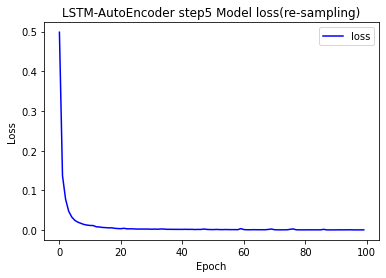

In [194]:
# 모델 다르게 
plt.plot(history['loss'], 'b-', label='loss')
plt.title('LSTM-AutoEncoder step5 Model loss(re-sampling)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #

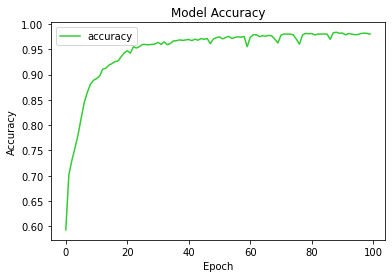

In [195]:
# 모델 정확도 시각화
plt.plot(history['accuracy'], 'limegreen', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

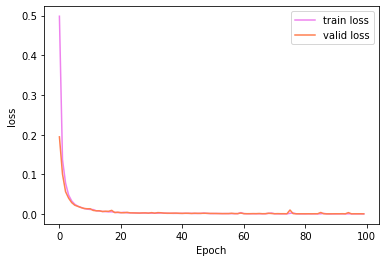

In [196]:
plt.plot(history['loss'], 'violet', label='train loss')
plt.plot(history['val_loss'], 'coral', label='valid loss')
plt.legend()
plt.xlabel('Epoch'); plt.ylabel('loss')
plt.show()

In [198]:
precision_rt, recall_rt, threshold_rt = ReconstructionError(lstm, validx_scaled, validy)

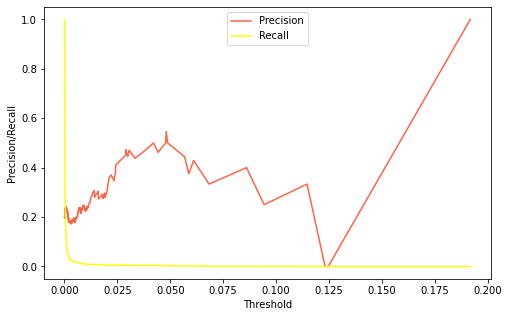

In [199]:
plt.figure(figsize=(8,5))
plt.plot(threshold_rt, precision_rt[1:], 'tomato', label='Precision')
plt.plot(threshold_rt, recall_rt[1:], 'yellow', label='Recall')
plt.xlabel('Threshold'); plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

In [200]:
# best position of threshold
index_cnt = [cnt for cnt, (p, r) in enumerate(zip(precision_rt, recall_rt)) if p==r][0]
print('precision: ',precision_rt[index_cnt],', recall: ',recall_rt[index_cnt])

# fixed Threshold
threshold_fixed = threshold_rt[index_cnt]
print('threshold: ',threshold_fixed)



precision:  0.23478260869565218 , recall:  0.23478260869565218
threshold:  0.0003987128218495669


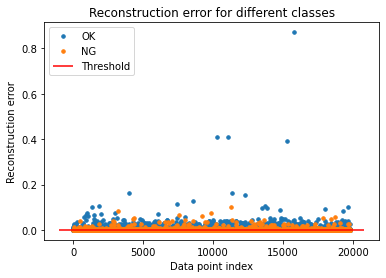

In [202]:
test_x_predictions = model.predict(testx_scaled)
mse = np.mean(np.power(flatten(testx_scaled) - flatten(test_x_predictions), 2), axis=1)

error_df = pd.DataFrame({'Reconstruction_error': mse,
                         'True_class': sum(testy.tolist(), [])})

groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "NG" if name == 1 else "OK")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

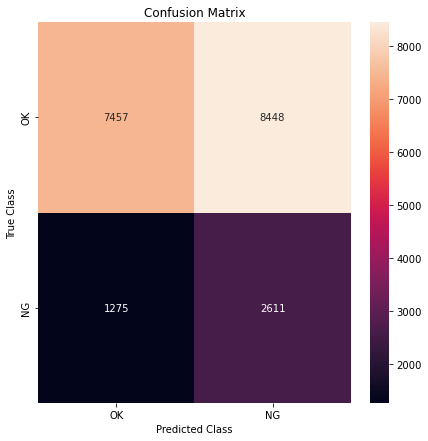

In [203]:
LABELS = ['OK', 'NG']
pred_y = [1 if e > threshold_fixed else 0 for e in error_df['Reconstruction_error'].values]

conf_matrix = metrics.confusion_matrix(error_df['True_class'], pred_y)
plt.figure(figsize=(7, 7))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class'); plt.ylabel('True Class')
plt.show()

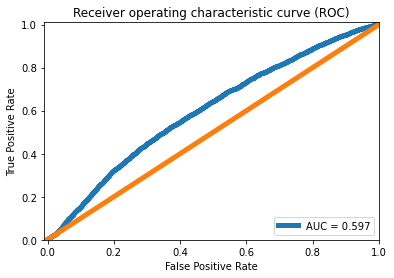

In [204]:
false_pos_rate, true_pos_rate, thresholds = metrics.roc_curve(error_df['True_class'], error_df['Reconstruction_error'])
roc_auc = metrics.auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate'); plt.xlabel('False Positive Rate')
plt.show()

In [205]:
pred_y[-5:]

[1, 0, 1, 0, 0]

In [ ]:

'''
# Regularization : 과대적합을 피하는 처리 과정

1) 가장 좋은 방법은 더 많은 훈련 데이터를 모으는 것

2) 차선책은 모델이 수용할 수 있는 정보의 양을 조절하거나 저장할 수 있는 정보에 제약(constraint)을 가하는 것

3) 모델에 있는 학습 파라미터의 수를 줄이는 것 (학습되는 가중치)

''''


In [211]:
# 
dt = ddfnew.copy()
dt = dt.drop('Unnamed: 0',  axis=1)

In [212]:
dt


,STD_DT,NUM,MELT_TEMP,MOTORSPEED,MELT_WEIGHT,INSP,TAG
0,2020-03-04 0:00,1,433,78,609,3.19,0
1,2020-03-04 0:01,15,772,1729,588,3.22,0
2,2020-03-04 0:02,27,483,167,571,3.19,0
3,2020-03-04 0:03,33,364,232,562,3.18,0
4,2020-03-04 0:04,46,402,203,543,3.18,0
...,...,...,...,...,...,...,...
83515,2020-04-30 23:55,835154,740,1748,373,3.22,0
83516,2020-04-30 23:56,835164,760,1725,355,3.21,0
83517,2020-04-30 23:57,835175,759,1723,342,3.22,0
83518,2020-04-30 23:58,835181,443,75,334,3.19,0


In [213]:
def x_ysplite(data):
    datax = data[[(data.columns[2]), (data.columns[3]), (data.columns[4]),
        (data.columns[5])]]
    datay =  data[[(data.columns[6])]]
    
    return datax, datay

In [214]:
x, y = x_ysplite(dt)

In [217]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, 
                                                    test_size=0.3)

print(x_train.shape, x_test.shape)

(58464, 4) (25056, 4)


In [218]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time 

In [219]:
m = sm.Logit(y_train, x_train)
results = m.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.428188
         Iterations 10


In [220]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    TAG   No. Observations:                58464
Model:                          Logit   Df Residuals:                    58460
Method:                           MLE   Df Model:                            3
Date:                Mon, 07 Nov 2022   Pseudo R-squ.:                  0.1670
Time:                        02:51:52   Log-Likelihood:                -25034.
converged:                       True   LL-Null:                       -30053.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
MELT_TEMP      -0.0167      0.000    -56.261      0.000      -0.017      -0.016
MOTORSPEED     -0.0062      0.000    -33.923      0.000      -0.007      -0.006
MELT_WEIGHT  2.537e-05   8.62e-06      2.943      0.003    8.47e-06    4.23e-05
INSP            2.2574      0.044     50.747      0.000       2.170       2.345
===============================================================================

Possibly complete quasi-separation: A fraction 0.20 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [221]:
np.exp(results.params)

MELT_TEMP      0.983461
MOTORSPEED     0.993799
MELT_WEIGHT    1.000025
INSP           9.558450
dtype: float64

In [222]:
pred_y = results.predict(x_test)
pred_y # 

60133    3.659339e-01
64091    1.112376e-07
17164    1.323206e-01
46822    1.052825e-07
26689    4.166909e-01
             ...     
10346    1.388300e-01
4810     1.720254e-01
79139    1.725397e-01
11266    1.448095e-07
12233    2.180915e-01
Length: 25056, dtype: float64

In [223]:
def cut_off(y, threshold) :
    Y = y.copy()  # 불량품을 측정할 때 보통 0.5보다 크게 잡는다. 
    Y[Y>threshold] = 1
    Y[Y<threshold] = 0
    return Y.astype(int)
    
pred_Y = cut_off(pred_y, 0.7)
pred_Y

60133    0
64091    0
17164    0
46822    0
26689    0
        ..
10346    0
4810     0
79139    0
11266    0
12233    0
Length: 25056, dtype: int64

In [228]:
cfmat = confusion_matrix(y_test, pred_Y)
print(cfmat)

def acc(cfmat):
    return (cfmat[0,0] + cfmat[1,1])/(cfmat[0,0] + cfmat[1,1] + cfmat[0,1] + cfmat[1,0])
acc(cfmat) 

# acc 0.787...

[[19793     0]
 [ 5263     0]]


0.7899505108556832

In [226]:
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns = ['ACC'])
for i in threshold :
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(y_test, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name = "threshold"
table.columns.name = "performance"
table

performance,ACC
threshold,
0.0,0.210049
0.1,0.434187
0.2,0.667585
0.3,0.717393
0.4,0.761295
0.5,0.783405
0.6,0.789551
0.7,0.789911
0.8,0.789951


AUC: 0.7605832421423409


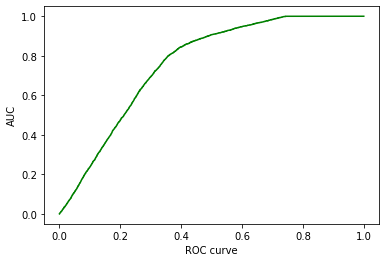

In [232]:
# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = roc_curve(y_test,pred_y, pos_label = 1)

# ROC curve
plt.plot(fpr,tpr, 'g-', label='AUC')
plt.xlabel('ROC curve')
plt.ylabel('AUC')
# AUC
auc = np.trapz(tpr, fpr)
print("AUC:",auc)